In [1]:
import convoys
from convoys import utils, plotting
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
raw_df = pd.read_csv('data/replicated_customer_instances_wordpress-enterprise_2023-09-20-19-10-07.csv')
raw_df.head()

,customer_id,customer_name,app_id,channel_id,channel_name,is_archived,customer_created_date,license_expiration_date,customer_last_active,customer_type,...,is_kurl,kurl_node_count_total,kurl_node_count_ready,k8s_version,client,is_dummy_instance,first_ready_at,number_versions_behind,version_age,entitlement_cores
0,2VfmbxjciASoTyneBbgI3N9osni,Central Banking Union,2C0OQyxiiA4pc3blK0cKs5VQS3N,2C0OR5HUAAge0xo2ggEwGwOHSG4,Stable,False,2023-09-20T18:46:23Z,2023-09-22T18:46:23Z,NaN,trial,...,False,0.0,0.0,v1.25.12+k3s1,KOTS,False,NaN,NaN,NaN,NaN
1,2VfmbxjciASoTyneBbgI3N9osni,Central Banking Union,2C0OQyxiiA4pc3blK0cKs5VQS3N,2C0OR5HUAAge0xo2ggEwGwOHSG4,Stable,False,2023-09-20T18:46:23Z,2023-09-22T18:46:23Z,NaN,trial,...,False,0.0,0.0,v1.26.7+k3s1,KOTS,False,NaN,NaN,NaN,NaN
2,2VfoVoSnpi89otAu54kl2eVzzEX,Four Letter Agency,2C0OQyxiiA4pc3blK0cKs5VQS3N,2C0OR5HUAAge0xo2ggEwGwOHSG4,Stable,False,2023-09-20T19:02:01Z,2023-09-22T19:02:00Z,2023-09-20T19:04:44Z,prod,...,False,0.0,0.0,v1.24.16+k3s1,Replicated-SDK,False,NaN,NaN,NaN,NaN
3,2Rq8WRGWd10rv6ZrBN4d7J8nG4r,Geeglo,2C0OQyxiiA4pc3blK0cKs5VQS3N,2C0OR5HUAAge0xo2ggEwGwOHSG4,Stable,False,2023-06-28T15:31:21Z,2024-01-06T00:00:00Z,2023-09-20T18:16:00Z,trial,...,False,0.0,0.0,v1.26.6-gke.1700,Replicated-SDK,False,NaN,NaN,NaN,498.0
4,2Rq8WRGWd10rv6ZrBN4d7J8nG4r,Geeglo,2C0OQyxiiA4pc3blK0cKs5VQS3N,2C0OR5HUAAge0xo2ggEwGwOHSG4,Stable,False,2023-06-28T15:31:21Z,2024-01-06T00:00:00Z,2023-09-20T18:16:00Z,trial,...,False,0.0,0.0,v1.26.6-gke.1700,KOTS,False,NaN,NaN,NaN,498.0


In [3]:
raw_df.dtypes

customer_id                       object
customer_name                     object
app_id                            object
channel_id                        object
channel_name                      object
is_archived                         bool
customer_created_date             object
license_expiration_date           object
customer_last_active              object
customer_type                     object
customer_status                   object
is_airgap_enabled                   bool
is_gitops_supported                 bool
is_identity_service_supported       bool
is_geoaxis_supported                bool
is_snapshot_supported               bool
has_entitlements                    bool
installed_version_label           object
installed_release_sequence         int64
is_helmvm_download_enabled          bool
instance_id                       object
instance_created_at               object
instance_last_active              object
app_status                        object
active          

In [4]:
# create a core dataset
instances = raw_df

# convert to datetime
instances['customer_created_date'] = pd.to_datetime(instances['customer_created_date'])
instances['license_expiration_date'] = pd.to_datetime(instances['license_expiration_date'])
instances['customer_last_active'] = pd.to_datetime(instances['customer_last_active'])
instances['instance_created_at'] = pd.to_datetime(instances['instance_created_at'])
instances['instance_last_active'] = pd.to_datetime(instances['instance_last_active'])
instances['first_ready_at'] = pd.to_datetime(instances['first_ready_at'])

# clean up the versions
instances['kots_version_clean'] = instances['kots_version'].str.extract(r'([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3})')

## Basic version stats
### KOTS versions & app versions

Text(0.5, 1.0, 'Count of instances by KOTS version')

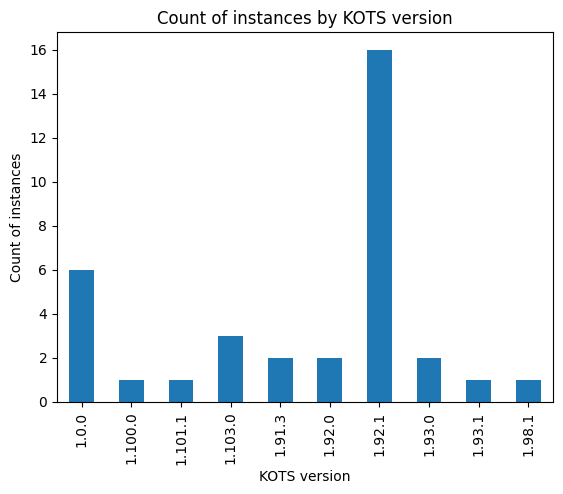

In [5]:
kots_versions = instances.groupby(['kots_version_clean'])['kots_version_clean'].count()

kots_versions.plot(kind='bar')
plt.xlabel("KOTS version")
plt.ylabel("Count of instances")
plt.title("Count of instances by KOTS version")

Text(0.5, 1.0, 'Count of instances by K8s version')

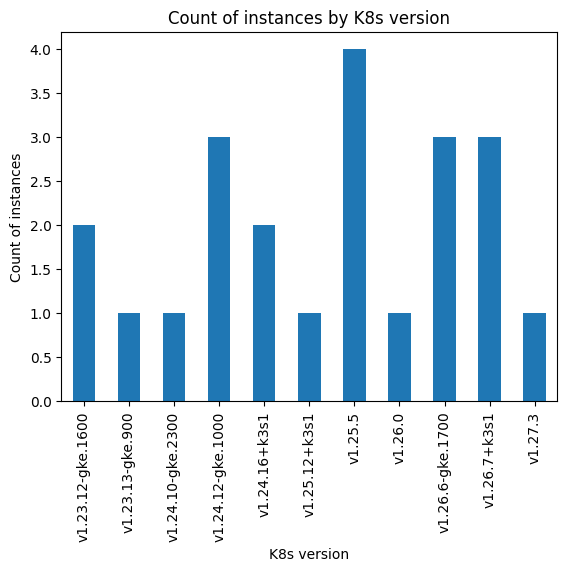

In [6]:
k8s_versions = instances.groupby(['k8s_version'])['k8s_version'].count()
k8s_versions.plot(kind='bar')
plt.xlabel("K8s version")
plt.ylabel("Count of instances")
plt.title("Count of instances by K8s version")

Text(0.5, 1.0, 'Count of instances by app version')

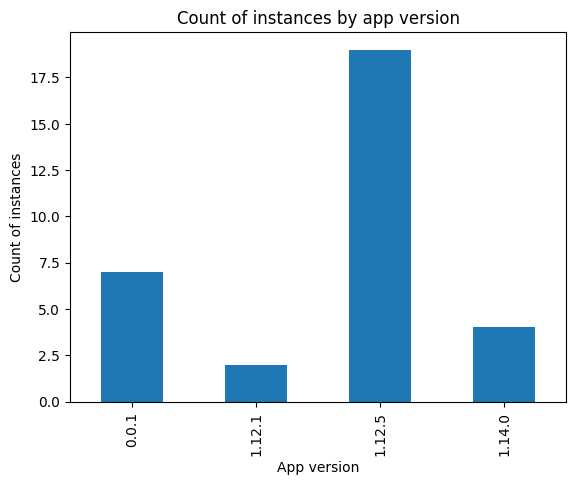

In [7]:
app_versions = instances.groupby(['installed_version_label'])['installed_version_label'].count()
app_versions.plot(kind='bar')
plt.xlabel("App version")
plt.ylabel("Count of instances")
plt.title("Count of instances by app version")

<Axes: title={'center': 'Share of instances by cloud provider'}, ylabel='cloud_provider'>

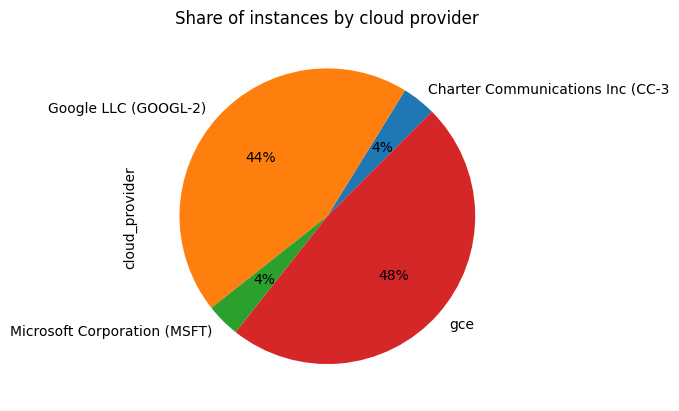

In [8]:
instances.groupby(['cloud_provider'])['cloud_provider'].count().plot(kind='pie', autopct='%1.0f%%', startangle=45, title='Share of instances by cloud provider')

## Cohort Analysis
### Time from customer creation to instance creation

/usr/local/lib/python3.9/site-packages/convoys/single.py:46: RuntimeWarning: divide by zero encountered in log
  self._vs.append(1 / numpy.log(prod_s_terms)**2 * sum_var_terms)
/usr/local/lib/python3.9/site-packages/convoys/single.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  self._vs.append(1 / numpy.log(prod_s_terms)**2 * sum_var_terms)


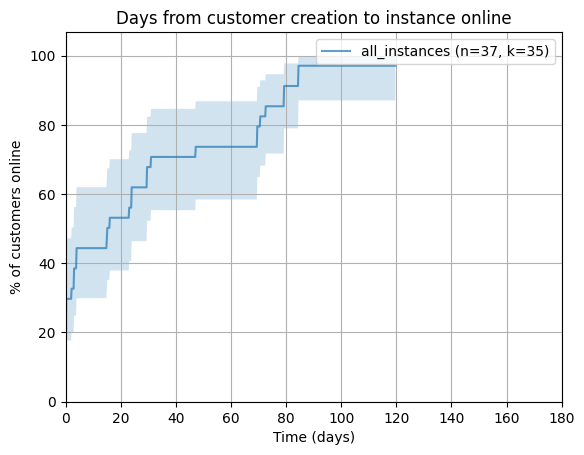

In [9]:
# create a dummy segment column
instances['dummy_segment'] = 'all_instances'

unit, groups, (G, B, T) = convoys.utils.get_arrays(
    instances, groups='dummy_segment', created='customer_created_date', converted='instance_created_at',
    unit='days', group_min_size=5)

convoys.plotting.plot_cohorts(G, B, T, model='kaplan-meier', ci=0.95, groups=groups, t_max=180)

plt.legend()
plt.rcParams["figure.figsize"] = [10,8]
plt.xlabel("Time (days)")
plt.ylabel("% of customers online")
plt.title("Days from customer creation to instance online")
plt.show()